In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import data

This is heart data from the UMass Statistical Data website (http://www.umass.edu/statdata/index.html)

In [2]:
dataset = np.genfromtxt('heart.csv', delimiter=",")

x = dataset[:]  # Age
x = np.insert(x,0,1,axis=1)  # Add 1's for bias

print x.shape

y = dataset[:,6]  # Cholesterol
y = np.reshape(y, (y.shape[0],1))  # Reshape to a column vector

print y.shape

(200, 18)
(200, 1)


# Notes

In the 1 predictor case...

The cost function for linear regression is
1/2m(sum((theta0 + theta1(x) - y) ^ 2))

Partial derivative wrt theta0: 1/m(sum(theta0 + theta1 - y))

Partial derivative wrt theta1: 1/m(sum(theta0 + theta1 - y)) * x

Parameter update: theta = theta - alpha(partial derivative)

# Evaluate hypothesis

All vectors are treated as column vectors. Here, X is a 200x18 feature matrix, and the weights are set as 18x1 column vector

Value of the hypothesis is just the dot product of X and the weights vector.

In [3]:
def h(weights, X):
    """ Calculate the hypothesis value.
    
    Parameters:
    weights -- a nx1 column vector, where n is the number of features/variables plus 1 for the bias/intercept
    X -- a mxn matrix, where m is the number of training examples, plus a column of 1's for the bias
    
    Return:
    A mx1 column vector containing the hypothesis values for each training example
    """

    return np.dot(X, weights)

# Test that we correctly evaluate the hypothesis value for each training example
theta = np.ones((x.shape[1],1))
print h(theta, x)

[[ 1421.]
 [ 1462.]
 [ 1729.]
 [ 1499.]
 [ 1350.]
 [ 1334.]
 [ 1470.]
 [ 1606.]
 [ 1697.]
 [ 1296.]
 [ 1510.]
 [ 1411.]
 [ 1347.]
 [ 1480.]
 [ 1458.]
 [ 1633.]
 [ 1489.]
 [ 1581.]
 [ 1495.]
 [ 1552.]
 [ 1454.]
 [ 1686.]
 [ 1648.]
 [ 1314.]
 [ 1514.]
 [ 1427.]
 [ 1477.]
 [ 1368.]
 [ 1532.]
 [ 1553.]
 [ 1405.]
 [ 1360.]
 [ 1243.]
 [ 1546.]
 [ 1515.]
 [ 1319.]
 [ 1529.]
 [ 1461.]
 [ 1637.]
 [ 1381.]
 [ 1524.]
 [ 1327.]
 [ 1461.]
 [ 1728.]
 [ 1381.]
 [ 1474.]
 [ 1264.]
 [ 1326.]
 [ 1564.]
 [ 1453.]
 [ 1529.]
 [ 1242.]
 [ 1553.]
 [ 1562.]
 [ 1449.]
 [ 1549.]
 [ 1310.]
 [ 1412.]
 [ 1441.]
 [ 1697.]
 [ 1490.]
 [ 1329.]
 [ 1489.]
 [ 1352.]
 [ 1636.]
 [ 1624.]
 [ 1514.]
 [ 1603.]
 [ 1464.]
 [ 1425.]
 [ 1459.]
 [ 1523.]
 [ 1310.]
 [ 1492.]
 [ 1389.]
 [ 1502.]
 [ 1769.]
 [ 1426.]
 [ 1610.]
 [ 1365.]
 [ 1770.]
 [ 1316.]
 [ 1372.]
 [ 1573.]
 [ 1386.]
 [ 1394.]
 [ 1426.]
 [ 1473.]
 [ 1483.]
 [ 1557.]
 [ 1236.]
 [ 1415.]
 [ 1528.]
 [ 1372.]
 [ 1536.]
 [ 1410.]
 [ 1314.]
 [ 1261.]
 [ 1501.]
 [ 1358.]


# Calculate cost

For each training example we calculate the total residual value using all available predictors.

Then we square each residual/error value (and sum across all training examples) with the dot product. The average squared error is then returned as the cost/loss value

In [4]:
def calculateCost(weights, X, Y):
    """Calculate total cost across all samples and features for a given set of weights
    
    Parameters:
    weights -- a nx1 column vector, where n is the number of features/variables plus 1 for the bias/intercept
    X -- a mxn matrix, where m is the number of training examples, plus a column of 1's for the bias
    Y -- a mx1 column vector containing the labels/targets for each training example
    
    Returns:
    Float value representing the average squared error across the entire dataset for a given set of weights
    """
    m = Y.shape[0]  # Number of training examples. Equivalent to X.shape[0]
    residuals = h(weights, X) - Y
    squared_error = np.dot(residuals.T, residuals)
    
    return residuals, float(1)/(2*m) * squared_error

# Test that we return a scalar cost value, calculated across all training examples and all features for a given set of weights
print calculateCost(theta, x, y)[1]

[[ 697361.66]]


# Gradient Descent

Simultaneously update the weight values after calculating the partial derivative

In [15]:
def gradientDescent(weights, X, Y, iterations = 1000, alpha = 1e-6):
    """Update weight values using gradient descent
    
    Parameters:
    
    Returns:
    
    """
    theta = weights
    m = Y.shape[0]
    cost_history = []

    for i in xrange(iterations):
        residuals, cost = calculateCost(theta, X, Y)
        gradient = (float(1)/m) * np.dot(residuals.T, X).T
        theta -= (alpha * gradient)
        
        # Store the cost for this iteration
        cost_history.append(cost)
        print "Iteration: %d | Cost: %f" % (i+1, cost)
        
    return cost_history

# Test gradient descent over 10 iterations
gradientDescent(np.ones((x.shape[1],1)), x, y, 10)            

Iteration: 1 | Cost: 697361.660000
Iteration: 2 | Cost: 396984.761509
Iteration: 3 | Cost: 226670.223049
Iteration: 4 | Cost: 130098.430340
Iteration: 5 | Cost: 75337.307241
Iteration: 6 | Cost: 44282.015792
Iteration: 7 | Cost: 26667.480892
Iteration: 8 | Cost: 16673.613556
Iteration: 9 | Cost: 11000.541529
Iteration: 10 | Cost: 7777.304198


[array([[ 697361.66]]),
 array([[ 396984.76150877]]),
 array([[ 226670.22304874]]),
 array([[ 130098.43034001]]),
 array([[ 75337.30724104]]),
 array([[ 44282.01579188]]),
 array([[ 26667.48089244]]),
 array([[ 16673.6135559]]),
 array([[ 11000.54152948]]),
 array([[ 7777.30419836]])]

#  Plot training curve

Iteration: 1 | Cost: 697361.660000
Iteration: 2 | Cost: 396984.761509
Iteration: 3 | Cost: 226670.223049
Iteration: 4 | Cost: 130098.430340
Iteration: 5 | Cost: 75337.307241
Iteration: 6 | Cost: 44282.015792
Iteration: 7 | Cost: 26667.480892
Iteration: 8 | Cost: 16673.613556
Iteration: 9 | Cost: 11000.541529
Iteration: 10 | Cost: 7777.304198
10


ValueError: x and y can be no greater than 2-D

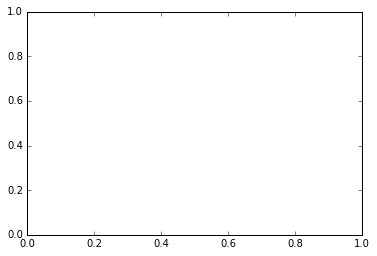

In [22]:
def plot_training_curve(history):
    plt.plot(history, range(len(history)))

history = gradientDescent(np.ones((x.shape[1],1)), x, y, 10)

print len(history)

plot_training_curve(history)